
# Project: Investigate a Dataset No_show patient appointemnts

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

the dataset under investigation are information collected from medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment.
it contains more than 100k of patients medical records.



### Questions to be investigated:
    
    1-What the percentage rate for the patients that showed to the appointment VS patients that didn't showed to the appointment.
    2-is the SMS_received column infleunce the patient in showing to the appointment ?
    3-health diagnosis for patients appointment that showed VS health diagnosis for patients appointment that didn't show.
    4-is there a relation between the Age and No_show ?

### import all the libraries that are needed in the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### read a CSV Extension file and convert the needed columns from String to date format.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv" ,parse_dates = ["ScheduledDay","AppointmentDay"])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df["Age"].unique() # we can also use value_counts()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1], dtype=int64)

### Observation: 

    1-if we check the last column we will see that the name use hyphen  instead of underscore so we rename the 
      column No-show to No_show.  now it's better.
    
    2-if we go to df.describe() above and look at age we see that it include age less than 0  and minmum are 0 if we 
    say they are newborn or infants and it's illogical to have age less than 0 so we need to drop the row that have age 
    of -1. 
    
    3-from the information taken from above we can see that the dataset doesn't have any null values.
    
    4-we see that the column PatientId have a float datatype we need to convert it to int so we can read it.
    
    


### Data Cleaning 

### 1-rename the columns if need it. 

here we rename the No-show column to No_show

In [6]:
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

### 2-Check if there any row that contais age less than 0 Years and remove it

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### after checkiing the patients age we will drop the rows that have value less  than 0

In [8]:
df[df["Age"] < 0]["Age"].count()

1

#### From the information below we see that the row number for Age equal to -1 are 99832

In [9]:
df[df["Age"] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


#### here we drop the row

In [10]:
df.drop(df.index[99832],inplace = True)

### Observation:
there are many rows that contain age less than 1 year like 0 year and that mean either they are newborns or infants 
Below is a Number of patients that have 0 age in their information. but we don't need ro drop it

In [11]:
df[df["Age"] <= 0]["Age"].count()

3539

In [12]:
df.count()

PatientId         110526
AppointmentID     110526
Gender            110526
ScheduledDay      110526
AppointmentDay    110526
Age               110526
Neighbourhood     110526
Scholarship       110526
Hipertension      110526
Diabetes          110526
Alcoholism        110526
Handcap           110526
SMS_received      110526
No_show           110526
dtype: int64

### 3-check for any duplications. if there drop it.

In [13]:
sum(df.duplicated())

0

### 4-Drop any row that contains null values.

In [14]:
df.dropna(axis = 0,how ="any",inplace = True)

### 5-Here we check if there are any columns that need to change type. 
here we see that type of PatientId  is float so we changed to long int so it can be readable.     

In [15]:
df['PatientId'] = df['PatientId'].astype("int64")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null int64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_show           110526 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 What the percentage rate for the patients that showed to the appointment VS patients that didn't showed to the appointment

 the percentage rate for the patients if he is showing to the appointment or not.  if the number are large for the patients that are not showing it gives us information that there are other impacts and more questions can be asked. 

In [17]:
df[df['No_show'] == 'Yes']['No_show'].count()

22319

In [18]:
df[df['No_show'] == 'No']['No_show'].count()

88207

 After checking the number of patients that show to the appointment we see that  approxmatily 20%  patients don't show to the appointemnt, and almost 80 % shows to the appointment.


In [19]:
#Store the patient that didn't showed to Not_showed variable.
Not_showed = df.No_show[df['No_show'] == 'Yes']

#here get the percentage for the patients that not showed.
Not_showedperc = Not_showed.count() / df["No_show"].count() * 100
Not_showedperc

20.193438647919944

In [20]:
#Store the patient that  showed to showed variable.
showed = df.No_show[df["No_show"] == "No"]

#here get the percentage for the patients that showed.
showedperc = showed.count() / df["No_show"].count() * 100
showedperc

79.806561352080053

### Here plotting the percentages for the showed and not showed patient in thier appointments. Using the pie plot

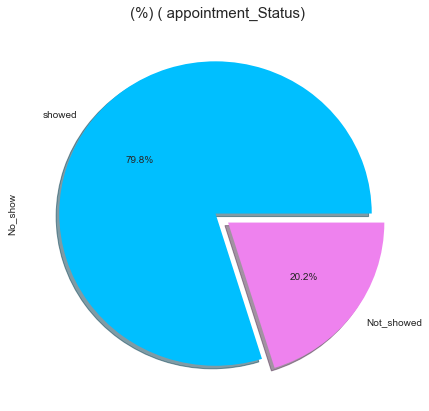

In [21]:
#here a lebel for the patients that showed and didn't show to the appointment.
label = ["showed","Not_showed"]
color = ['deepskyblue','violet']
#plotting using pie chart.
pieChart = df["No_show"].value_counts().plot.pie(figsize=(7,7),explode = (0,0.1),shadow=True, autopct='%1.1f%%',labels = label,colors = color );

#adding a title to the graph.
pieChart.set_title(' (%) ( appointment_Status)',  fontsize = 15);


### Q1_conclusion:

in the pie chart below we see thatthe perecentage of patients that shows to the appointemnt indicated in the blue color are almost 80% and perecentage of patients that don't shows to the appointemnt indicated in the violet color are 20% 

### Research Question 2  is the SMS_received column infleunce the patient in showing to the appointment ?

After seeing that the number of patients are not showing are 20%. we need to see if the patient recieve an SMS message impact in showing or not 

#### Finding the number of patinets that recieved SMS but didn't show 

In [22]:
#Number ofpatienta that recieved sms but not showed in the appointment.
SMS_not_showed = df[df["No_show"] == "Yes"] [df["SMS_received"] == 1]
SMS_not_showed["No_show"].count()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


9784

#### Finding the number of patinets that recieved SMS but show 

In [23]:
#Number of patients that recieved sms but showed in the appointment.
SMS_showed = df[df["No_show"] == "No"] [df["SMS_received"] ==1]
SMS_showed["No_show"].count()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


25698

### plotting the data using Bar chart for number of patient that recieved sms in two catogery the showed and not_showed patients in an appointment.

Text(0,0.5,'SMS_received')

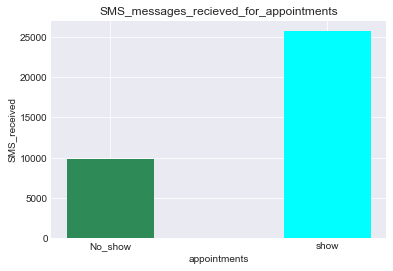

In [24]:
sizes = [SMS_not_showed["No_show"].count(),SMS_showed["No_show"].count()]
locations = [1, 3]
label = ["No_show" ,"show"]
bar1 = plt.bar( locations,sizes,color=['seagreen','cyan'],tick_label = label)
plt.title("SMS_messages_recieved_for_appointments")
plt.xlabel('appointments')
plt.ylabel('SMS_received')

### Q2_conclusion:  

the total number of patients that recieved an SMS for thier appointment and showed is almost twice the number of not showing.

#### Finding the number of patinets that didn't recieved SMS and didn't show.  

In [25]:
#Number ofpatienta that not recieved sms but not showed in the appointment.
No_SMS_not_showed = df[df["No_show"] == "Yes"] [df["SMS_received"] == 0]
No_SMS_not_showed["No_show"].count()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


12535

#### Finding the number of patinets that didn't recieved SMS but showed 

In [26]:
#Number of patients that not recieved sms but showed in the appointment.
No_SMS_showed = df[df["No_show"] == "No"] [df["SMS_received"] == 0]
No_SMS_showed["No_show"].count()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


62509

### plotting the data using Bar chart for number of patient that not recieved sms in two catogery the showed and not_showed patients in an appointment.

Text(0,0.5,'SMS_received')

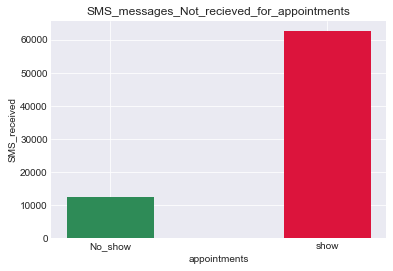

In [27]:
sizes = [No_SMS_not_showed["No_show"].count(),No_SMS_showed["No_show"].count()]
locations = [1, 3]
label = ["No_show" ,"show"]
bar1 = plt.bar( locations,sizes,color=['seagreen','crimson'],tick_label = label)
plt.title("SMS_messages_Not_recieved_for_appointments")
plt.xlabel('appointments')
plt.ylabel('SMS_received')

### Q2_conclusion: 

the total number of patients that recieved an SMS for thier appointment and showed is 6 Times the number of not showing. it gives information that the schedule are in same date as the appointment  



### Research Question 3 health diagnosis for patients appointment  that showed  VS health diagnosis for patients appointment that didn't show.

#### Finding the percentage of patients didn't show up and have Hipertension.

In [28]:
#calculating the total patient that have either of the diseases or symptoms or and didn't show to the appointment.
total_show = df[df["No_show"] == "Yes"][df["Hipertension"] == 1].count() + df[df["No_show"] == "Yes"][df["Diabetes"] == 1].count() + df[df["No_show"] == "Yes"][df["Alcoholism"] == 1].count() + df[df["No_show"] == "Yes"][df["Handcap"] == 1].count()
#calculating the number of patient that have Hipertension and didn't show.
Hipertension = df[df["No_show"] == "Yes"][df["Hipertension"] == 1]
Hiper = Hipertension["No_show"].count()
hiper_percent = Hiper /total_show["No_show"] * 100
hiper_percent

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


60.400320256204964

#### Finding the percentage of patients didn't show up and have diabetes.

In [29]:
#calculating the number of patient that have Diabetes and didn't show.
Diabetes = df[df["No_show"] == "Yes"][df["Diabetes"] == 1]
diabetes = Diabetes["No_show"].count()
diabetes_percent = diabetes / total_show["No_show"] * 100
diabetes_percent

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


22.898318654923937

#### Finding the percentage of patients didn't show up and Alcoholism.

In [30]:
#calculating the number of patient that have Alcoholism and didn't show.
Alcoholism = df[df["No_show"] == "Yes"][df["Alcoholism"] == 1]
alcoholism = Alcoholism["No_show"].count()
alcoholism_percent = alcoholism / total_show["No_show"] * 100
alcoholism_percent

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


10.840672538030423

#### Finding the percentage of patients didn't show up and  Handcap.

In [31]:
#calculating the number of patient that have Handcap and didn't show.
Handcap = df[df["No_show"] == "Yes"][df["Handcap"] == 1]
handcap = Handcap["No_show"].count()
handcap_percent = handcap / total_show["No_show"] * 100
handcap_percent

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5.8606885508406723

### plotting the patient that didn't show to the appointment using pie chart.

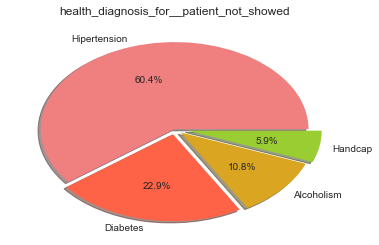

In [32]:
label = ["Hipertension","Diabetes","Alcoholism","Handcap"]
sizes = [hiper_percent,diabetes_percent,alcoholism_percent,handcap_percent]
color = ['lightcoral','tomato','goldenrod','yellowgreen']
#ploting
plt.pie(sizes,explode = (0,0.06,0.06,0.1),shadow=True,labels = label,autopct='%1.1f%%',colors = color);
plt.title('health_diagnosis_for__patient_not_showed');

### Q3_conclusion: 
 based on the chart above we can see majority of patients having Hypertension but didn't show to the appointment check up were 60% percent of all the patients that didn't show in the recorded dataset period.in the other hand, Diabetes,Alcoholism and handcap thier percent of the total not showing were 22.9%, 10.8%, 5.9% in there respective order. 

#### Finding the percentage of patients show up and have Hipertension.

In [33]:
#calculating the total patient that have either of the diseases or symptoms or and didn't show to the appointment.
total_noshow = df[df["No_show"] == "No"][df["Hipertension"] == 1].count() + df[df["No_show"] == "No"][df["Diabetes"] == 1].count() + df[df["No_show"] == "No"][df["Alcoholism"] == 1].count() + df[df["No_show"] == "No"][df["Handcap"] == 1].count()

#calculating the number of patient that have Hipertension and didn't show.
Hipertension = df[df["No_show"] == "No"][df["Hipertension"] == 1]
Hiper = Hipertension["No_show"].count()
hiper_percent1 = Hiper /total_noshow["No_show"] * 100
hiper_percent1;

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


#### Finding the percentage of patients show up and have Diabetes.

In [34]:
#calculating the number of patient that have Diabetes and didn't show.
Diabetes = df[df["No_show"] == "No"][df["Diabetes"] == 1]
diabetes = Diabetes["No_show"].count()
diabetes_percent1 = diabetes / total_noshow["No_show"] * 100
diabetes_percent1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


22.535552403031037

#### Finding the percentage of patients show up and  alcoholism.

In [35]:
#calculating the number of patient that have Alcoholism and didn't show.
Alcoholism = df[df["No_show"] == "No"][df["Alcoholism"] == 1]
alcoholism = Alcoholism["No_show"].count()
alcoholism_percent1 = alcoholism / total_noshow["No_show"] * 100
alcoholism_percent1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


9.283415798761288

#### Finding the percentage of patients show up and handcap.

In [36]:
#calculating the number of patient that have Handcap and didn't show.
Handcap = df[df["No_show"] == "No"][df["Handcap"] == 1]
handcap = Handcap["No_show"].count()
handcap_percent1 = handcap / total_noshow["No_show"] * 100
handcap_percent1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5.7991072973253521

### plotting the patient that showed to the appointment using pie chart.

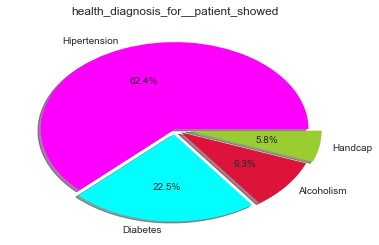

In [37]:
label = ["Hipertension","Diabetes","Alcoholism","Handcap"]
sizes = [hiper_percent1,diabetes_percent1,alcoholism_percent1,handcap_percent1]
color = ['magenta','aqua','crimson','yellowgreen']

#ploting
plt.pie(sizes,explode = (0,0.06,0.06,0.1),shadow=True,labels = label,autopct='%1.1f%%',colors = color);
plt.title('health_diagnosis_for__patient_showed');

### Q3_conclusion: 

based on the chart above we can see majority of patients having Hypertension but showed up to the appointment check up were 62% percent of all the patients that showed in the recorded dataset period. in the other hand, Diabetes,Alcoholism and handcap thier percent of the total showing were 22.5%, 9.3%, 5.8% in there respective order.  

In [38]:
df["No_show"].value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

 if we compare the two chart above we will see that the number of patients having hypertension and showed up is 62.4% of the total patients that showed up that means 62.4% of 88207 or 55041 out 88207 patients they have hypertension and showed to the appointment. in the other hand the patients that have hypertension but didn't show up were 60.4% of 22319 or 13480 out of 22319 patients they have hypertension and didn't showed to the appointment. that means the patinets that showed up are 4 time the patients that have hypertension and didn't showed up. 

### Research Question 4 is there a relation between the Age and No_show ?

to distribute the Ages we define bins having a distribution of 4 type of Ages the first bin rang from 0 to 17 and it will put in child bin,range from 17 to 30 it will put in young adult,from 30 to 65 it will put in Adult and lastly  from 65 to 100 will be in elderly.doing all of this by using pandas cut by using right = False means we don't want to include an age if its more than 105 year.  

In [39]:
bins = [0,17,30,65,105]
label = ["child","young adult","adult","elderly"]
Age_group = pd.cut(df.Age,bins,right = False,labels = label)
Age_group.count()

110521

by Using clustered bar chart will see the relation between ages and if they shows or not 


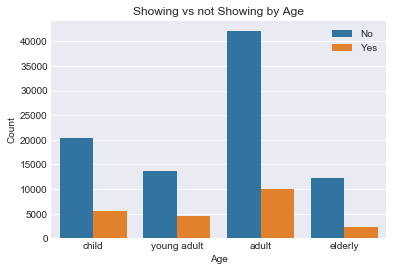

In [40]:
sns.countplot(x = Age_group,hue = df.No_show,data = df);
plt.title("Showing vs not Showing by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend();
plt.show()

## Notes: 
#### No means patients showing to the appointment.(by Blue color)
#### Yes means patients Didn't showing to the appointment.(by Orange color)
### Q4_Conclusion: 

based on the clustered bar chart, we observed that the adult that range from 30 to 65 are the most showing to the appointment that twice the number of child that range from 0 to 17. Followed by child, young adult and lastly the elder. 

<a id='conclusions'></a>
## Conclusions


### limitation:
-
    there some feature that are missing like if the patient Employer or not,if it's first time opening a file, or if he have medical. or if the patient have multiple diseases other than the recorded.
    there some recorde that contains ilogical data like age is 0 or -1
    
    
### finding:
-    ##### Question 1 What the percentage rate for the patients that showed to the appointment VS patients that didn't showed to the appointment:
    
    here nearly 80% of the patient that made an appointemnt showed up.
    
    
-    ##### Research Question 2  is the SMS_received column infleunce the patient in showing to the appointment ?
    
    patients that didn't show and recieved an sms message is more than number of people recieved but didn't show
    that means that sms messages plays an influnces rules in appointemnt.
    
    
-    ##### Research Question 3 health diagnosis for patients appointment  that showed  VS health diagnosis for patients appointment that didn't show:
    
    patients that have hibertension are more influnce to show to the appointment than Alcoholism Diabetes and Handcap.
    patients that have Alcoholism Diabetes or Handcap are more likely to not show to the appointemnt.
    
    
-    ##### Research Question 4 is there a relation between the Age and No_show ?

    Number of patients detrmine if they showed or not related by age means from the information observed shows that the adults are the largest group that shows to the appointment followed by child, Young adlut and lastly elderly.
    
    the features such as Gender and Scholarship isn't a factor to detrmine if the patient will show or not.